## Santander Product Recommendation 

Santander is a bank which offers financial products and services. The whole dataset is 1.5 years and has monthly records of multiple columns that store customer’s information, such as customer code, status of employment, customer’s country residence, age, gender of customer, gross income of the household, etc. There are also 24 product columns storing product items a customer has, such as "credit card", "savings account", “mortgage”, “short-term deposits”, “medium-term deposits”, “long-term deposits”, etc.

Link of data source: https://www.kaggle.com/c/santander-product-recommendation

Goal: To predict what products Santander’ customers will purchase in the next month based on past data.


## Description of data fields.
| Column |   Description |
|------|------|
|employee_index|A active, B ex employed, F filial, N not employee, P pasive|
|country_residence|Customer's Country residence|
|sex|Customer's sex|
|age|Age|
|first_join_date|The date in which the customer became as the first holder of a contract in the bank|
|new_customer_index|New customer Index. 1 if the customer registered in the last 6 months|
|seniority|Customer seniority (in months)|
|primary|1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)|
|customer_type|Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)|
|customer_relation|Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)|
|residence_idx|Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)|
|foreigner_idx|Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
|channel|Channel used by the customer to join|
|deceased|Deceased index. N/S|
|address|Address type. 1, primary address|
|province_code|Province code (customer's address)|
|province_name|Province name|
|activity_idx|Activity index (1, active customer; 0, inactive customer)|
|gross_income|Gross income of the household|
|segment|segmentation: 01 - VIP, 02 - Individuals 03 - college graduated|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic('pylab inline')
#get_ipython().magic('matplotlib auto')

pylab.rcParams['figure.figsize'] = (12, 8)
import sys


Populating the interactive namespace from numpy and matplotlib


The downloaded training data has 13,647,310 rows including header. It is quiet difficult to use my personal computer to do the analyses. So following Ike' suggestion, I reduce the input data to 20% of the original training data by randomly sampling the raw data. First generating indexes of lines for about 20% of the data.



In [ ]:
#===randomly generate indexes for ~ 20 % of data 

#from random import sample
#n_sample = int(13647309*0.2)
#indexes = sample(range(13647309), k=n_sample)
#with open('indexes_20_percent.txt', 'w') as f:
#     for s in indexes:
#        f.write(str(s) + '\n')

Generating input data by taking 20 % of the training data 

In [ ]:
#===generate 20 % training data based on randomly generated indexes

#f_ind = open('indexes_20_percent.txt','r')
#f = open('input/train_ver2.csv','r')

#row_number = []
#with open('indexes_20_percent.txt','r') as f_ind:
#    for line in f_ind:
#       row_number.append(int(line.strip()))

#row_number.sort()
#print(type(row_number))

#ofile  = open('input/train_subset.csv', 'wb')

#lines = f.readlines()
#num_lines = len(lines)

##randomly generated indexes has header line
##ofile.write(lines[0])
#for i in row_number:
#    ofile.write(lines[i])

#f.close()
#f_ind.close()
#ofile.close()



Original dataset has Spanish header, I changed the Spanish header to English header so we know fields better.


In [ ]:
#===write a csv with English header (easy to understand)
# df = pd.read_csv('input/train_subset.csv',encoding = 'ISO-8859-1') 
# df = df.rename(index=str, columns={'fecha_dato': 'date', 'ncodpers': 'id','ind_empleado':'employee_index',
# 'pais_residencia':'country_residence',
# 'sexo':'sex',
# 'fecha_alta':'first_join_date',
# 'ind_nuevo':'new_customer_index',
# 'antiguedad':'seniority',
# 'indrel':'primary',
# 'ult_fec_cli_1t':'last_date_primary',
# 'indrel_1mes':'customer_type',
# 'tiprel_1mes':'customer_relation',
# 'indresi':'residence_idx',
# 'indext':'foreigner_idx',
# 'conyuemp':'spouse_idx',
# 'canal_entrada':'channel',
# 'indfall':'deceased',
# 'tipodom':'address',
# 'cod_prov':'province_code',
# 'nomprov':'province_name',
# 'ind_actividad_cliente':'activity_idx',
# 'renta':'gross_income',
# 'segmento':'segment',
# 'ind_ahor_fin_ult1':'saving_account',
# 'ind_aval_fin_ult1':'guarantees',
# 'ind_cco_fin_ult1':'current_account',
# 'ind_cder_fin_ult1':'derivada_account',
# 'ind_cno_fin_ult1':'payroll_account',
# 'ind_ctju_fin_ult1':'junior_account',
# 'ind_ctma_fin_ult1':'mas_particular_account',
# 'ind_ctop_fin_ult1':'particular_account',
# 'ind_ctpp_fin_ult1':'particular_plus_account',
# 'ind_deco_fin_ult1':'short-term_deposits',
# 'ind_deme_fin_ult1':'medium-term_deposits',
# 'ind_dela_fin_ult1':'long-term_deposits',
# 'ind_ecue_fin_ult1':'e-account',
# 'ind_fond_fin_ult1':'funds',
# 'ind_hip_fin_ult1':'mortgage',
# 'ind_plan_fin_ult1':'pensions',
# 'ind_pres_fin_ult1':'loans',
# 'ind_reca_fin_ult1':'taxes',
# 'ind_tjcr_fin_ult1':'credit_card',
# 'ind_valo_fin_ult1':'securities',
# 'ind_viv_fin_ult1':'home_account',
# 'ind_nomina_ult1':'payroll',
# 'ind_nom_pens_ult1':'pensions_1',
# 'ind_recibo_ult1':'direct_debit'})
# df.to_csv('input/train_20percent.csv',index=False)


## Exploratory analysis

First check NAN and missing values.

In [2]:
#Option 1: df.isnull().any().any() - This returns a boolean value
#If you make it df.isnull().any(), you can find just the columns that have NaN values:
#df.isnull().any()
df = pd.read_csv('input/train_20percent.csv',encoding = 'ISO-8859-1')
df.isnull().sum()

C:\Users\weichun\Anaconda3v\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


date                             0
id                               0
employee_index                5454
country_residence             5454
sex                           5470
age                              0
first_join_date               5454
new_customer_index            5454
seniority                        0
primary                       5454
last_date_primary          2724464
customer_type                29573
customer_relation            29573
residence_idx                 5454
foreigner_idx                 5454
spouse_idx                 2729088
channel                      36790
deceased                      5454
address                       5455
province_code                18657
province_name                18657
activity_idx                  5454
gross_income                559126
segment                      37473
saving_account                   0
guarantees                       0
current_account                  0
derivada_account                 0
payroll_account     

#### There are too many misssing values for "last_date_primary", "spouse_idx" so these two fields are dropped.

In [3]:
df = df.drop(["last_date_primary", "spouse_idx"], axis=1) 

#### Age and seniority has non-numeric values. Use errors='coerce' to force them to be NaN so they can be removed.

In [4]:
df['age']   = pd.to_numeric(df['age'], errors='coerce')
df['seniority']   = pd.to_numeric(df['seniority'], errors='coerce')
#remove negative seniority
df=df[df['seniority']>0]
#save original df as df_save
df_save = df

In [5]:
#### checking how many rows of data
len(df)

2697458

#### I would like to know the content of each field. So uniq values for each field are printed.

In [6]:
# feature_cols =['date', 'id', 'employee_index', 'country_residence', 'sex', 'age',
#        'first_join_date', 'new_customer_index', 'seniority', 'primary',
#        'customer_type', 'customer_relation', 'residence_idx', 'foreigner_idx',
#        'channel', 'deceased', 'address', 'province_code', 'province_name',
#        'activity_idx', 'gross_income', 'segment']
feature_cols =['date','employee_index']
for ind, feature_col in enumerate(feature_cols):
    
    uniq_values = list(df[feature_col].unique())
    
    print("uniq values for "+feature_col+": ",uniq_values)
    print("number of uniq values for "+feature_col+": ",len(uniq_values))

uniq values for date:  ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
number of uniq values for date:  17
uniq values for employee_index:  ['N', 'A', 'F', 'B', 'S']
number of uniq values for employee_index:  5


In [7]:
df.date.unique()

array(['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28',
       '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
       '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
       '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28'], dtype=object)

In [ ]:
# id_set1 = list(df[df['date']=='2015-01-28'].id.unique())
# id_set2 = list(df[df['date']=='2015-02-28'].id.unique())
# print len(id_set1)
# print len(id_set2)
#(list(set(id_set1) & set(id_set2)))

#### I would like to know how many new accounts is added comparing to the previous month based on the same population. So the following codes is to find out for the same customers, given that they do not hold account previous month, how many of them add that account in the following month.

In [10]:
target_cols=["saving_account","guarantees","current_account","derivada_account","payroll_account","junior_account","mas_particular_account","particular_account","particular_plus_account","short-term_deposits","medium-term_deposits","long-term_deposits","e-account","funds","mortgage","pensions","loans","taxes","credit_card","securities","home_account","payroll","pensions_1","direct_debit"]
#target_cols=["current_account","derivada_account"]
alldates=['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28',
       '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
       '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
       '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28',
       '2016-05-28']
for prod in target_cols:
    new_accounts=[]
    for i in range(len(alldates)-1):
        #print alldates[i],alldates[i+1]
        df_tmp1 = df[ (df[prod]== 0) & (df['date']==alldates[i])]
        df_tmp2 = df[ (df[prod]== 1) & (df['date']==alldates[i+1])]
        new_accounts.append(len(set(df_tmp2['id']) & set(df_tmp1['id'])))

#df_tmp1 = df[ (df['current_account']== 0) & (df['date']=='2015-01-28')]

    y_pos = np.arange(len(alldates[1:]))
    plt.bar(y_pos, new_accounts, align='center', alpha=0.5)
    plt.xticks(y_pos, alldates[1:])
    plt.xticks(rotation='vertical',fontsize=12)
    plt.yticks(fontsize=14)

    plt.ylabel('New accounts',fontsize=16)
    plt.title(prod,fontsize=22)
 
    #plt.show()
    plt.savefig(prod)
    plt.close()


In [38]:
coverage=[]
product=[]

for prod in target_cols:
    product.append(prod)
    coverage.append(float(len(df[df[prod]==1]))/float(len(df))*100)
    #print(prod,float(len(df[df[prod]==1]))/float(len(df))*100)

data = [('Product', product),
         ('Coverage', coverage),
         ]

import pandas as pd
df2 = pd.DataFrame.from_items(data)
#print df2
df2_sort = df2.sort_values(by='Coverage', ascending=False)
# df2.columns[1]

print("Product coverage:")
print(df2_sort)
ax = sns.barplot(y="Product", x="Coverage", data=df2_sort)

pylab.rcParams['figure.figsize'] = (18, 10)
plt.yticks(fontsize=13)
plt.ylabel('')

plt.xlabel('Coverage (%)',fontsize=14)
plt.title("Product coverage",fontsize=20)
plt.xticks(fontsize=14)
plt.savefig("Coverage.png")
plt.close()

Product coverage:
                    Product   Coverage
2           current_account  65.748642
7        particular_account  13.041723
23             direct_debit  12.941777
12                e-account   8.356979
4           payroll_account   8.161869
22               pensions_1   5.981743
21                  payroll   5.505628
17                    taxes   5.249053
18              credit_card   4.492118
8   particular_plus_account   4.370374
11       long-term_deposits   4.332264
19               securities   2.575907
13                    funds   1.865682
6    mas_particular_account   0.956716
5            junior_account   0.948523
15                 pensions   0.929542
14                 mortgage   0.592261
20             home_account   0.392110
16                    loans   0.255648
9       short-term_deposits   0.173089
10     medium-term_deposits   0.165897
3          derivada_account   0.039704
0            saving_account   0.010046
1                guarantees   0.002558


#### There is a remarkable peak at 2015-06-28 for the taxes account. For the current account, we saw two peaks at 2015-06-28 and 2015-12-28. There is a increasing trend of new accounts for e-account and a decreasing trend for short-term deposits (no more new accounts in the year 2016).

In [ ]:
#df_tmp2 = df[ (df['current_account']== 1) & (df['date']=='2015-02-28')]

In [ ]:
#len(set(df_tmp2['id']) & set(df_tmp1['id']))

In [ ]:
#df[df['id']==917507]


#### Plot age distribution.

In [39]:
df['age']   = pd.to_numeric(df['age'], errors='coerce')
with sns.plotting_context('notebook',font_scale=1.5):
    sns.set_style('whitegrid')
    sns.distplot(df['age'].dropna(),
                 bins=50,
                 kde=False)
    
    pylab.rcParams['figure.figsize'] = (12, 10)

    plt.yticks(fontsize=14)
    plt.ylabel('Counts')

    plt.xlabel('Age',fontsize=14)
    plt.title("Age Distribution",fontsize=20)
    plt.xticks(fontsize=14)
    plt.savefig("Age.png")
    plt.close()

#### Peak for age distribution is around 25 and 45.

In [ ]:
# codes in this cell takes forever to run. ???
# num_occur = df.groupby('id').agg('size').value_counts()

# plt.figure(figsize=(8,4))
# sns.barplot(num_occur.index, num_occur.values, alpha=0.8, color='b')
# plt.xlabel('Number of Occurrences of the customer', fontsize=12)
# plt.ylabel('Number of customers', fontsize=12)
# plt.show()

In [ ]:
#num_occur


#### I would like to see with respect to date, the variation of total counts each product. Thus I groupby the "date", apply "sum" then make bar plots of total counts for every product with respect to date. 

In [25]:
df_sum = df.groupby('date',as_index=False).sum()
df_sum

,date,id,age,new_customer_index,seniority,primary,address,province_code,activity_idx,gross_income,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions_1,direct_debit
0,2015-01-28,96114154071,5007184.0,36.0,10341600.0,138447.0,123845.0,3281226.0,66658.0,1.379692e+10,...,1022,1526,400,7285,7072,4012,666,7684.0,8539.0,19140
1,2015-02-28,97016299281,5034530.0,557.0,10337690.0,142324.0,124488.0,3299023.0,67222.0,1.388059e+10,...,1021,1495,424,7463,6985,3940,662,8203.0,9035.0,19074
2,2015-03-28,97465843335,5042948.0,1125.0,10287146.0,139900.0,124514.0,3298678.0,67518.0,1.389148e+10,...,954,1435,411,7346,6832,3939,607,8465.0,8703.0,19298
3,2015-04-28,98042391808,5072203.0,1641.0,10330820.0,141152.0,125178.0,3317793.0,68244.0,1.392161e+10,...,1033,1471,415,7706,7218,4022,682,8465.0,9314.0,19731
4,2015-05-28,98783134613,5088870.0,2204.0,10323146.0,141908.0,125640.0,3332066.0,68936.0,1.409518e+10,...,957,1469,452,7597,7140,3870,596,8221.0,8429.0,19191
5,2015-06-28,99189152007,5085666.0,2696.0,10268992.0,139369.0,125747.0,3335018.0,69126.0,1.406130e+10,...,884,1441,430,8135,7454,3838,629,8542.0,9364.0,19621
6,2015-07-28,128418352789,6663247.0,3787.0,13181034.0,182193.0,162299.0,4288156.0,69862.0,1.817281e+10,...,901,1482,438,8332,7373,3975,648,8859.0,9774.0,19851
7,2015-08-28,134090901503,6782487.0,6665.0,13382859.0,185365.0,166549.0,4379097.0,71702.0,1.873322e+10,...,979,1483,380,8385,7418,3932,629,8555.0,9408.0,19243
8,2015-09-28,136934634200,6835527.0,8247.0,13500717.0,191618.0,168294.0,4436331.0,72688.0,1.875647e+10,...,943,1489,389,8285,7139,4102,598,8617.0,9441.0,19980
9,2015-10-28,143562868676,6993015.0,12124.0,13732357.0,197488.0,173184.0,4567288.0,74471.0,1.916671e+10,...,946,1531,440,8653,7179,4141,615,8931.0,9831.0,20920


#### bar plots of total counts for every product with respect to date.

In [43]:
#df_sum
header = list(df_sum)
#for i in range (len(header)):
#    print(i,header[i])
print(header[9:])
for prod in header[9:]:
    pylab.rcParams['figure.figsize'] = (12, 14)
    sns.barplot(x="date", y=prod, data=df_sum)
    plt.xlabel('',fontsize=14)
    plt.xticks(rotation='vertical',fontsize=14)
    plt.title('Total counts for '+ prod,fontsize=20) 
    plt.ylabel('Total counts',fontsize=14)
    plt.yticks(fontsize=14)
    #plt.show()
    plt.savefig("Total_counts_"+prod)
    plt.close()


# sns.barplot(x="product", y="total", data=df_bar1)
# plt.title('Percentage of product for gross income < 1 M')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation='vertical')
#df_bar

['gross_income', 'saving_account', 'guarantees', 'current_account', 'derivada_account', 'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account', 'short-term_deposits', 'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds', 'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pensions_1', 'direct_debit']


#### There is a trend that the number of saving account, short and medium-term deposit is decreasing and number of e-account is increasing.

#### Checking how many missing values in the data. 

In [44]:
df.isnull().sum()

date                            0
id                              0
employee_index                  0
country_residence               0
sex                            16
age                             0
first_join_date                 0
new_customer_index              0
seniority                       0
primary                         0
customer_type                  35
customer_relation              35
residence_idx                   0
foreigner_idx                   0
channel                      5076
deceased                        0
address                         0
province_code               13199
province_name               13199
activity_idx                    0
gross_income               533846
segment                      5902
saving_account                  0
guarantees                      0
current_account                 0
derivada_account                0
payroll_account                 0
junior_account                  0
mas_particular_account          0
particular_acc

#### Removing the records that are null and checking again how many missing values in the data.¶

In [45]:
#"isnull()" is a function that checks if something is NaN or empty. 
#The "~" (tilde) operator negates the following expression. 
#So we are saying give me a dataframe from your original dataframe but only where the 'data' rows are NOT null.
df = df[~df.isnull()]

In [46]:
df.isnull().sum()

date                            0
id                              0
employee_index                  0
country_residence               0
sex                            16
age                             0
first_join_date                 0
new_customer_index              0
seniority                       0
primary                         0
customer_type                  35
customer_relation              35
residence_idx                   0
foreigner_idx                   0
channel                      5076
deceased                        0
address                         0
province_code               13199
province_name               13199
activity_idx                    0
gross_income               533846
segment                      5902
saving_account                  0
guarantees                      0
current_account                 0
derivada_account                0
payroll_account                 0
junior_account                  0
mas_particular_account          0
particular_acc

#### Drop the row (axis=0) where any of the elements is nan.

In [47]:
df = df.dropna(axis=0)
df.head()
df.isnull().sum()

date                       0
id                         0
employee_index             0
country_residence          0
sex                        0
age                        0
first_join_date            0
new_customer_index         0
seniority                  0
primary                    0
customer_type              0
customer_relation          0
residence_idx              0
foreigner_idx              0
channel                    0
deceased                   0
address                    0
province_code              0
province_name              0
activity_idx               0
gross_income               0
segment                    0
saving_account             0
guarantees                 0
current_account            0
derivada_account           0
payroll_account            0
junior_account             0
mas_particular_account     0
particular_account         0
particular_plus_account    0
short-term_deposits        0
medium-term_deposits       0
long-term_deposits         0
e-account     

In [48]:
#df.loc[df.segment.notnull(),:]
#print column of mixed type
for i in [5,8,11,15]: 
    print(df.columns[i])

age
seniority
customer_relation
deceased


#### Plot seniority distribution.

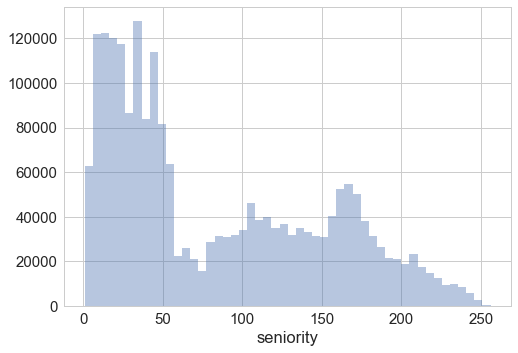

In [49]:
df['seniority']   = pd.to_numeric(df['seniority'], errors='coerce')
###train['antiguedad'] = train['antiguedad'].replace(to_replace=['     NA'], value=np.nan)
with sns.plotting_context('notebook',font_scale=1.5):
    sns.set_style('whitegrid')
    sns.distplot(df[df['seniority']>0]['seniority'].dropna(),
                 bins=50,
                 kde=False)

#### In this 20% training dataset, there is relatively large population for seniority less than 50.

#### Study gross income distribution for gross imcome < 1M and > 1M.

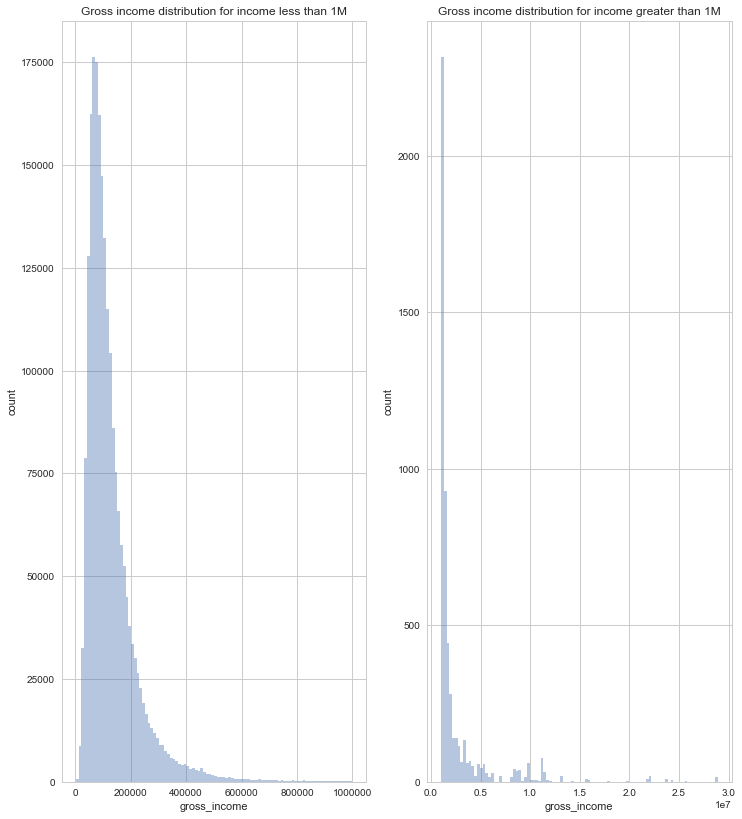

In [50]:

plt.subplot(1, 2, 1)
sns.distplot(df['gross_income'][(df['gross_income']>=0)&(df['gross_income']<1e6)].dropna(),
                 bins=100,
                 kde=False)
plt.title('Gross income distribution for income less than 1M')
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.distplot(df['gross_income'][(df['gross_income']>=0)&(df['gross_income']>1e6)].dropna(),
                 bins=100,
                 kde=False)
plt.title('Gross income distribution for income greater than 1M')
plt.ylabel('count')

plt.show()

#### The peak is around 100K for gross income < 1000K (1M). The peak is at the left-most end for gross income > 1M.

In [ ]:
# with sns.plotting_context('notebook',font_scale=1.5):
#     sns.set_style('whitegrid')
#     sns.distplot(df['gross_income'][df['gross_income']>1e6].dropna(),
#                  bins=100,
#                  kde=False)
#     sns.plt.title('Very rich people gross income distribution')
#     sns.plt.ylabel('count')

In [71]:
#study accounts very rich people have
header = list(df)
print(header[22:])
#df_prod = df[header[24:]]
#df_sum = df[header[22:]][df['gross_income']>1e6].sum() #calculate # accounts for people of gross income > 1M
df_sum = df[header[22:]][df['gross_income']>0].sum() #calculate # accounts for all people
print(df_sum)
total_count = df_sum.tolist()
print(len(total_count))
bar_labels = [i for i in header[22:]]

total_count_dict = {'product': bar_labels,
                    'total' : total_count}

df_bar = pd.DataFrame.from_dict(total_count_dict)
df_bar = df_bar[df_bar['total']>0]
df_bar = df_bar.sort_values(by='total', ascending=False)

df_bar = df_bar.drop(df_bar.index[[0]])
ax = sns.barplot(y="total", x="product", data=df_bar)

pylab.rcParams['figure.figsize'] = (12, 14)
#plt.xticks(rotation='vertical',fontsize=14)
plt.title('Product counts',fontsize=20) 
plt.ylabel('Counts',fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('',fontsize=14)
plt.xticks(rotation='vertical',fontsize=14)
#plt.show()
plt.savefig("product_counts")
plt.close()


['saving_account', 'guarantees', 'current_account', 'derivada_account', 'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account', 'short-term_deposits', 'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds', 'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pensions_1', 'direct_debit']
saving_account                 248.0
guarantees                      63.0
current_account            1417101.0
derivada_account               898.0
payroll_account             190290.0
junior_account               22223.0
mas_particular_account       19727.0
particular_account          298709.0
particular_plus_account     101481.0
short-term_deposits           3609.0
medium-term_deposits          3769.0
long-term_deposits          100767.0
e-account                   194091.0
funds                        43064.0
mortgage                     14087.0
pensions                     21967.0
loans

In [69]:
df_bar

,product,total
2,current_account,1417101.0
7,particular_account,298709.0
23,direct_debit,298475.0
12,e-account,194091.0
4,payroll_account,190290.0
22,pensions_1,140394.0
21,payroll,129183.0
17,taxes,124763.0
18,credit_card,105122.0
8,particular_plus_account,101481.0


#### Defining sum of product function to compare accounts for people with gross income less and more than 1M

In [52]:
#===calculate total counts of product
def product_sum(df_sum):
    totals = (df_sum.sum())

    total_count = df_sum.tolist()
    total_count = [total_count[i]/totals*100 for i in range(len(total_count))]
    #print(total_count)
    bar_labels = [i for i in header[22:]]

    total_count_dict = {'product': bar_labels,
                        'total' : total_count}

    df_bar = pd.DataFrame.from_dict(total_count_dict)
    return df_bar

#### Comparing accounts for people with gross income < 1M and > 1M

In [53]:
#comparing accounts for people with gross income < 1M and > 1M
header = list(df)
print(header[22:])
df_sum1 = df[header[22:]][df['gross_income']<1e6].sum()
df_sum2 = df[header[22:]][df['gross_income']>1e6].sum()

df_bar1 = product_sum(df_sum1)
df_bar2 = product_sum(df_sum2)

df_bar1 = df_bar1.sort_values(by='total', ascending=0)
df_bar2 = df_bar2.sort_values(by='total', ascending=0)

print(df_bar1)

['saving_account', 'guarantees', 'current_account', 'derivada_account', 'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account', 'short-term_deposits', 'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds', 'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pensions_1', 'direct_debit']
                    product      total
2           current_account  42.907340
7        particular_account   9.038321
23             direct_debit   9.030856
12                e-account   5.876223
4           payroll_account   5.758600
22               pensions_1   4.248228
21                  payroll   3.909167
17                    taxes   3.769513
18              credit_card   3.178364
8   particular_plus_account   3.069087
11       long-term_deposits   3.052093
19               securities   1.781305
13                    funds   1.303622
5            junior_account   0.672841
15          

#### Next, let's study what products people have the most. The accout distribution is expressed in percentage.

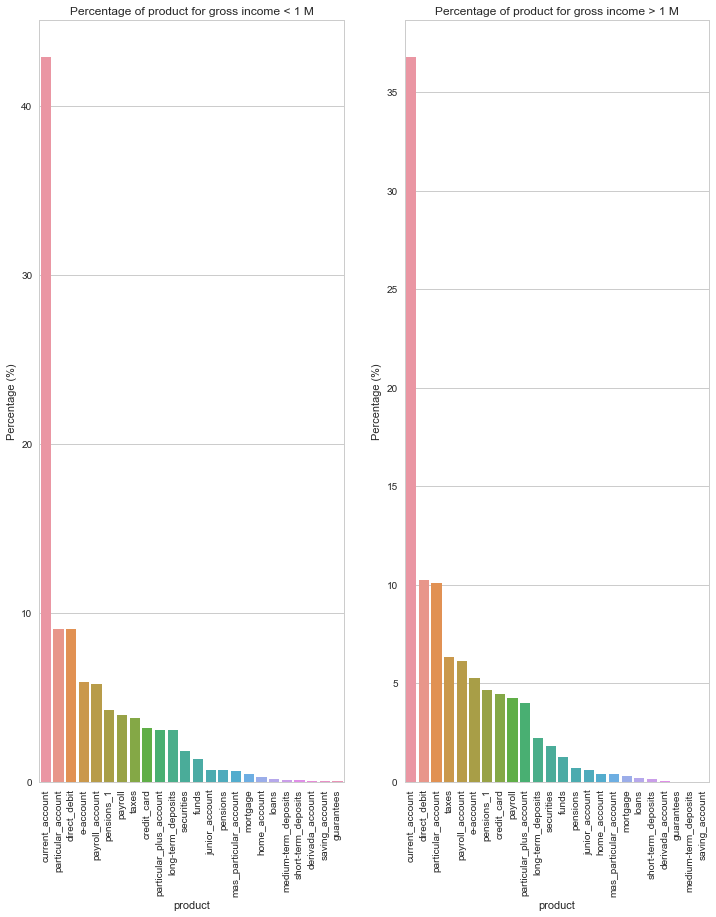

In [54]:
# sns.barplot(x="product", y="total", data=df_bar2)
# plt.title('Percentage of product for gross income > 1 M')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation='vertical')


plt.subplot(1, 2, 1)
sns.barplot(x="product", y="total", data=df_bar1)
plt.title('Percentage of product for gross income < 1 M')
plt.ylabel('Percentage (%)')
plt.xticks(rotation='vertical')
plt.subplot(1, 2, 2)
sns.barplot(x="product", y="total", data=df_bar2)
plt.title('Percentage of product for gross income > 1 M')
plt.ylabel('Percentage (%)')
plt.xticks(rotation='vertical')
plt.show()

#### Making box plots for all product columns with respect to numeric features (age, seniority and gross income).

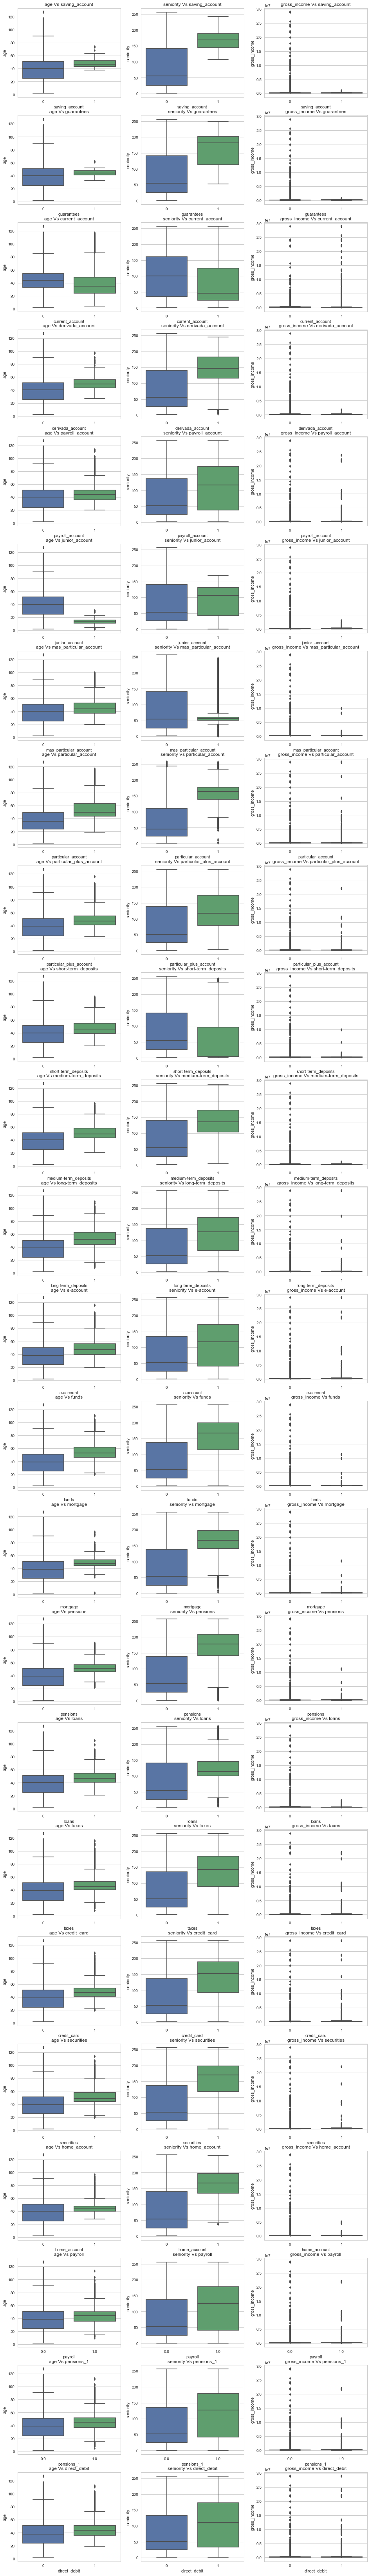

In [55]:
fig = plt.figure(figsize=(16, 120))
target_cols =['saving_account','guarantees', 'current_account', 'derivada_account', 'payroll_account',
       'junior_account', 'mas_particular_account', 'particular_account',
       'particular_plus_account', 'short-term_deposits',
       'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds',
       'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'pensions_1', 'direct_debit']

numeric_cols = ['age', 'seniority', 'gross_income']
#for ind1, numeric_col in enumerate(numeric_cols):
plot_count = 0
for ind, target_col in enumerate(target_cols):
    for numeric_col in numeric_cols:
        plot_count += 1
        plt.subplot(24, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=df)
        plt.title(numeric_col+" Vs "+target_col)
plt.show()

In [83]:
fig = plt.figure(figsize=(16, 120))
target_cols =['saving_account','guarantees', 'current_account', 'derivada_account', 'payroll_account',
       'junior_account', 'mas_particular_account', 'particular_account',
       'particular_plus_account', 'short-term_deposits',
       'medium-term_deposits', 'long-term_deposits', 'e-account', 'funds',
       'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'pensions_1', 'direct_debit']

numeric_cols = ['age', 'seniority', 'gross_income']
#for ind1, numeric_col in enumerate(numeric_cols):
dfsub = df[df['gross_income']<1e6]
plot_count = 0
pylab.rcParams['figure.figsize'] = (32, 12)

for ind, target_col in enumerate(target_cols):
    plot_count = 0
    for numeric_col in numeric_cols:
        plot_count += 1
        #plt.subplot(24, 3, plot_count)
        plt.subplot(1, 3, plot_count)
        sns.boxplot(x=target_col, y=numeric_col, data=dfsub)
        plt.title(numeric_col+" vs "+target_col,fontsize=24)
        plt.ylabel(numeric_col,fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlabel(target_col,fontsize=18)
        plt.xticks(fontsize=18)
    plt.savefig("box_plot_vs_"+target_col)
    plt.close()

#### We can see some differences between 0(without accounts) and 1(with accounts).